In [1]:
# Librerias utiles
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly
import seaborn as sns 
import plotly.express as px
import missingno as msno
import plotly.io as pio
import plotly.graph_objects as go
sns.set_theme()

In [2]:
victimas = pd.read_csv('reporte_semujeres.csv',low_memory=False, dtype={'pk_perfil_agresor': 'object','num_hijos':'int64'}, parse_dates=['fecha_recepcion'])

In [3]:
victimas.fecha_recepcion

0       2015-08-07
1       2015-08-07
2       2015-08-07
3       2015-08-07
4       2015-07-27
           ...    
28520   2021-08-18
28521   2021-08-18
28522   2021-08-20
28523   2021-08-20
28524   2021-08-20
Name: fecha_recepcion, Length: 28525, dtype: datetime64[ns]

In [4]:
victimas.fk_euv.value_counts()

3117201835    5
3116902216    5
3117206585    4
3117205038    4
3117200857    4
             ..
3117207090    1
3117202342    1
3117211933    1
3117211286    1
3117213246    1
Name: fk_euv, Length: 26590, dtype: int64

## Recortar los primeros 6 digitos de la columna 'Dependencia de recepcion'

In [5]:
victimas['Dependencia de recepcion'] = victimas['Dependencia de recepcion'].str.slice(start=6)

## Conservar solo los registros en donde la dependencia de recepción haya sido SEMUJERES

In [6]:
semujeres = victimas[victimas['Dependencia de recepcion'].str.contains("MUJER")==True]

In [7]:
semujeres.shape

(14512, 55)

In [8]:
semujeres.fk_euv.value_counts()

3117200857    4
3117208232    4
3117213369    4
3117210227    4
3117202747    4
             ..
3117206833    1
3117205903    1
3117204467    1
3117203487    1
3117209054    1
Name: fk_euv, Length: 14011, dtype: int64

In [9]:
semujeres[['fk_euv','pk_caso']].value_counts()

fk_euv      pk_caso
31AG100352  3          1
3117204546  3          1
3117204572  1          1
3117204571  1          1
3117204570  1          1
                      ..
3117209433  1          1
3117209432  1          1
3117209431  1          1
3117209430  1          1
3116700018  2          1
Length: 14512, dtype: int64

## Tenemos 14,011 mujeres y 14,512 casos únicos al dia de la consulta el 23 de agosto 2021

In [10]:
semujeres.to_csv('semujeres_dashboard.csv', index=False)

# SERVICIOS

In [11]:
#servicios = pd.read_csv('../BD-sucias/servicios_23_AGO_2021.csv', low_memory=False, parse_dates=['fecha_captura'])
servicios = pd.read_csv('../BD-sucias/servicios_23_AGO_2021.csv', low_memory=False)

In [12]:
servicios.fecha_captura.isna().sum()

11001

In [13]:
servicios.fecha_captura = pd.to_datetime(servicios.fecha_captura, format='%d/%m/%Y', errors = 'ignore')
servicios.fecha_captura

0       2018-05-25
1       2020-11-29
2       2018-09-06
3       2018-05-24
4       2018-07-27
           ...    
20868          NaT
20869          NaT
20870          NaT
20871          NaT
20872          NaT
Name: fecha_captura, Length: 20873, dtype: datetime64[ns]

In [14]:
servicios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20873 entries, 0 to 20872
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha_captura                 9872 non-null   datetime64[ns]
 1   fecha_modificacion            9872 non-null   object        
 2   fk_euv                        9872 non-null   object        
 3   fk_caso                       9872 non-null   float64       
 4   fk_estatus_servicio           9872 non-null   float64       
 5   estatus                       9872 non-null   object        
 6   fk_euv.1                      9872 non-null   object        
 7   USUSERVICIO                   9867 non-null   object        
 8   USUARIO_SUBI_cASO             9872 non-null   object        
 9   serviciodetalle               9872 non-null   object        
 10  tiposervicio                  9872 non-null   object        
 11  numeroservicios             

## Conservar aquellos servicios atendidos por SEMUJERES

In [15]:
servicios.dependenciaquebrindoservicio.unique()

array(['SECRETARÍA DE LAS MUJERES', 'PODER JUDICIAL',
       'PROCURADURÍA DE LA DEFENSA DEL MENOR Y LA FAMILIA',
       'SECRETARÍA DE SEGURIDAD PÚBLICA',
       'COMISIÓN EJECUTIVA ESTATAL DE ATENCIÓN A VÍCTIMAS',
       'SECRETARÍA DE SALUD', nan,
       'SECRETARÍA DE EDUCACIÓN DEL GOBIERNO DEL ESTADO DE YUCATÁN'],
      dtype=object)

In [16]:
servicios_semujeres = servicios[servicios['dependenciaquebrindoservicio'].str.contains("MUJER")==True]

In [17]:
# SERVICIOS
servicios_semujeres = servicios_semujeres[['fk_euv','USUSERVICIO','fk_caso','fecha_captura','serviciodetalle','tiposervicio','estatus','dependenciaquebrindoservicio','numeroservicios']]

In [18]:
servicios_semujeres.fk_caso = servicios_semujeres.fk_caso.astype(int)
servicios_semujeres.numeroservicios = servicios_semujeres.numeroservicios.astype(int)

In [19]:
servicios_semujeres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8442 entries, 0 to 9867
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fk_euv                        8442 non-null   object        
 1   USUSERVICIO                   8442 non-null   object        
 2   fk_caso                       8442 non-null   int32         
 3   fecha_captura                 8442 non-null   datetime64[ns]
 4   serviciodetalle               8442 non-null   object        
 5   tiposervicio                  8442 non-null   object        
 6   estatus                       8442 non-null   object        
 7   dependenciaquebrindoservicio  8442 non-null   object        
 8   numeroservicios               8442 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 593.6+ KB


In [20]:
indicadores_caev = servicios_semujeres.copy()

In [21]:
indicador_3 = servicios_semujeres.copy()
indicador_3[indicador_3.fk_euv=='3117213094']

fk_euv USUSERVICIO  fk_caso fecha_captura        serviciodetalle  \
7002  3117213094    CYUCIM38        1    2021-03-30            Psicológico   
7003  3117213094    CYUCIM38        1    2021-03-30  Legales y/o jurídicos   
7004  3117213094    CYUCIM38        1    2021-03-30  Legales y/o jurídicos   
7005  3117213094    CYUCSM40        1    2021-05-02            Psicológico   
7006  3117213094    CYUCSM40        1    2021-05-14            Psicológico   
7007  3117213094    CYUCIM38        1    2021-06-06  Legales y/o jurídicos   
7008  3117213094    CYUCIM38        2    2021-06-06            Psicológico   
7009  3117213094    CYUCIM38        2    2021-06-06  Legales y/o jurídicos   
7010  3117213094    CYUCIM38        2    2021-06-06  Legales y/o jurídicos   
7011  3117213094    CYUCIM38        2    2021-06-08           Canalización   
7012  3117213094    CYUCIM38        2    2021-07-05  Legales y/o jurídicos   
7013  3117213094    CYUCSM40        2    2021-07-11         Trabajo Social   
7014  3117213094    CYUCSM40        2    2021-08-15         Trabajo Social   

     tiposervicio     estatus dependenciaquebrindoservicio  numeroservicios  
7002        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                1  
7003        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                2  
7004        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                3  
7005        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                4  
7006        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                5  
7007        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                6  
7008        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                1  
7009        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                2  
7010        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                3  
7011     Servicio        Alta    SECRETARÍA DE LAS MUJERES                4  
7012        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                5  
7013     Servicio  En proceso    SECRETARÍA DE LAS MUJERES                6  
7014     Servicio  En proceso    SECRETARÍA DE LAS MUJERES                7

In [22]:
indicador_3[indicador_3.fk_euv=='3117206472']

fk_euv USUSERVICIO  fk_caso fecha_captura     serviciodetalle  \
2034  3117206472    CYUCIM37        1    2018-03-12  Violencia y género   
2035  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2036  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2037  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2038  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2039  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2040  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2041  3117206472    CYUCIM12        1    2018-08-29  Violencia y género   
2042  3117206472    CYUCIM40        1    2018-08-31  Violencia y género   
2043  3117206472    CYUCIM12        1    2018-10-16  Violencia y género   

     tiposervicio     estatus dependenciaquebrindoservicio  numeroservicios  
2034     Programa        Alta    SECRETARÍA DE LAS MUJERES                1  
2035     Programa  En proceso    SECRETARÍA DE LAS MUJERES                2  
2036     Programa  En proceso    SECRETARÍA DE LAS MUJERES                3  
2037     Programa  En proceso    SECRETARÍA DE LAS MUJERES                4  
2038     Programa  En proceso    SECRETARÍA DE LAS MUJERES                5  
2039     Programa  En proceso    SECRETARÍA DE LAS MUJERES                6  
2040     Programa  En proceso    SECRETARÍA DE LAS MUJERES                7  
2041     Programa  En proceso    SECRETARÍA DE LAS MUJERES                8  
2042     Programa  En proceso    SECRETARÍA DE LAS MUJERES                9  
2043     Programa   Concluido    SECRETARÍA DE LAS MUJERES               10

In [23]:
len(indicador_3)

8442

In [24]:
mujeres_concluidas = indicador_3[indicador_3.estatus=='Concluido'].fk_euv.unique()
mujeres_concluidas  = indicador_3[indicador_3.fk_euv.isin(mujeres_concluidas)]
mujeres_concluidas.fk_euv.value_counts()

3117206472    10
3117206345     9
3117206332     9
3117203623     8
3117200374     8
              ..
3117204878     1
3117200950     1
3116905330     1
3116903084     1
3117200506     1
Name: fk_euv, Length: 73, dtype: int64

In [25]:
mujeres_unicas = mujeres_concluidas.fk_euv.unique()

In [26]:
mujeres_concluidas

fk_euv USUSERVICIO  fk_caso fecha_captura        serviciodetalle  \
4     3116700061    CYUCIM11        1    2018-07-27     Violencia y género   
5     3116700061    CYUCIM11        1    2018-07-27     Violencia y género   
93    3116900453    CYUCIM39        1    2018-12-27                  Otros   
94    3116900453    CYUCIM39        1    2018-12-27  Legales y/o jurídicos   
95    3116900453    CYUCIM07        2    2018-08-24     Violencia y género   
...          ...         ...      ...           ...                    ...   
8988  3117601066    CYUCSM25        1    2020-01-09     Violencia y género   
9251  3117601337    CYUCSM40        2    2021-02-09  Legales y/o jurídicos   
9252  3117601337    CYUCSM40        2    2021-02-09            Psicológico   
9253  3117601337    CYUCIM55        3    2021-02-27            Psicológico   
9254  3117601337    CYUCIM55        3    2021-02-27            Psicológico   

     tiposervicio     estatus dependenciaquebrindoservicio  numeroservicios  
4        Programa        Alta    SECRETARÍA DE LAS MUJERES                1  
5        Programa   Concluido    SECRETARÍA DE LAS MUJERES                2  
93       Servicio        Alta    SECRETARÍA DE LAS MUJERES                1  
94          Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                2  
95       Programa        Alta    SECRETARÍA DE LAS MUJERES                1  
...           ...         ...                          ...              ...  
8988     Programa   Concluido    SECRETARÍA DE LAS MUJERES                3  
9251        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                1  
9252        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                2  
9253        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                1  
9254        Apoyo   Concluido    SECRETARÍA DE LAS MUJERES                2  

[252 rows x 9 columns]

In [27]:
test = mujeres_concluidas[mujeres_concluidas.fk_euv == '3117206472'].iloc[[0, -1]]
dias = test.fecha_captura.diff().tail(1)
test_df = pd.DataFrame({'fk_euv':'3117206472','dias':dias,'semanas': int(round(dias / np.timedelta64(1, 'W'))),'numeroservicios':test.numeroservicios.tail(1)})
test_df = test_df.reset_index(drop=True)
test_df

fk_euv     dias  semanas  numeroservicios
0  3117206472 218 days       31               10

In [28]:
test = mujeres_concluidas[(mujeres_concluidas.fk_euv == '3116900453') & (mujeres_concluidas.fk_caso == 2)]
test

fk_euv USUSERVICIO  fk_caso fecha_captura     serviciodetalle  \
95  3116900453    CYUCIM07        2    2018-08-24  Violencia y género   
96  3116900453    CYUCIM07        2    2018-08-24  Violencia y género   
97  3116900453    CYUCIM07        2    2018-08-24  Violencia y género   

   tiposervicio     estatus dependenciaquebrindoservicio  numeroservicios  
95     Programa        Alta    SECRETARÍA DE LAS MUJERES                1  
96     Programa  En proceso    SECRETARÍA DE LAS MUJERES                2  
97     Programa   Concluido    SECRETARÍA DE LAS MUJERES                3

In [29]:
df = pd.DataFrame(columns=['fk_euv','fk_caso','dias','semanas','numeroservicios'])
for mujer in mujeres_unicas:
    testito = mujeres_concluidas[mujeres_concluidas.fk_euv == mujer]

    casos_concluidos = testito[testito.estatus=='Concluido'].fk_caso.values

    servicios_concluidos = testito[testito.estatus=='Concluido'].serviciodetalle.values

    for caso in casos_concluidos:
        for servicio in servicios_concluidos:
            test = mujeres_concluidas[(mujeres_concluidas.fk_euv == mujer)&(mujeres_concluidas.fk_caso == caso)&(mujeres_concluidas.serviciodetalle == servicio)].iloc[[0, -1]]
            dias = test.fecha_captura.diff().tail(1)
            semanas =  int(round(dias / np.timedelta64(1, 'W')))
            servicios = test.numeroservicios.tail(1)
            test_df = pd.DataFrame({'fk_euv':mujer, 'fk_caso':caso,'dias':dias,'semanas': semanas,'numeroservicios':servicios,'serviciodetalle':servicio})
            df = pd.concat([df, test_df], ignore_index=True)
df

fk_euv fk_caso    dias semanas numeroservicios        serviciodetalle
0   3116700061       1  0 days       0               2     Violencia y género
1   3116900453       2  0 days       0               3     Violencia y género
2   3116900787       2 62 days       9               4     Violencia y género
3   3116903084       1  0 days       0               1  Legales y/o jurídicos
4   3116905330       1  0 days       0               1     Violencia y género
..         ...     ...     ...     ...             ...                    ...
74  3117213539       1 15 days       2               4            Psicológico
75  3117213676       1  3 days       0               2  Legales y/o jurídicos
76  3117213957       1  0 days       0               1     Violencia y género
77  3117601066       1  0 days       0               3     Violencia y género
78  3117601337       3  0 days       0               2            Psicológico

[79 rows x 6 columns]

In [30]:
df['semanas'] = pd.to_numeric(df['semanas'])
df.groupby('serviciodetalle').semanas.mean()

serviciodetalle
Canalización              0.000000
Legales y/o jurídicos     0.000000
Psicológico              12.375000
Trabajo Social            0.000000
Violencia y género       10.490196
Name: semanas, dtype: float64

In [31]:
round(df.semanas.mean())

9

In [32]:
fig = px.histogram(df, x = 'semanas',
                title='Gráfica 5. Histograma del tiempo promedio transcurrido entre el primer contacto con la usuaria y la conclusión del proceso.',
                #color_discrete_sequence = px.colors.qualitative.Prism,
                #text = 'count',
                #color = 'USUSERVICIO',
                #color = profesionistas.index,
                color_discrete_sequence = [px.colors.qualitative.Prism[1]],
                #color_discrete_sequence= px.colors.sequential.Plasma,
                labels = {'semanas': 'Semanas transcurridas', 'count':'Frecuencia'},
                nbins = 10
                )
fig.update_layout(showlegend = False, yaxis_title="Frecuencia",xaxis_title="Semanas transcurridas", height=500)
#fig.update_layout(title_y='Número de profesionistas')

fig.update_layout(shapes=[
    # adds line at y=5
    dict(
      type= 'line',
      xref= 'x', x0= 9, x1= 9,
      yref= 'paper', y0= 0, y1= 1,
      line=dict(color='white', width=1, dash='dash'),
    )], height=500)

fig.add_annotation(x=14.25, y=30,
            text="Promedio: 9",
            showarrow=False,
            yshift=10,
            font=dict(color='white'))

pio.write_html(fig, file='../docs/figs/g20.html', include_plotlyjs='cdn', full_html=False)


fig.show()

In [33]:
servicios_semujeres = servicios_semujeres.drop_duplicates(ignore_index=True, subset=['fk_euv','fk_caso','serviciodetalle'], keep='last')
servicios_semujeres = servicios_semujeres.reset_index(drop=True)

In [34]:
len(servicios_semujeres)

6244

In [35]:
servicios_semujeres.fk_euv.value_counts()

3117213094    6
3117212791    6
3117211404    5
3117101921    5
3117213565    5
             ..
3117207975    1
3117206644    1
3117213768    1
3117207588    1
3117209689    1
Name: fk_euv, Length: 4956, dtype: int64

In [36]:
servicios_semujeres[servicios_semujeres.fk_euv=='3117213094']

fk_euv USUSERVICIO  fk_caso fecha_captura        serviciodetalle  \
4687  3117213094    CYUCSM40        1    2021-05-14            Psicológico   
4688  3117213094    CYUCIM38        1    2021-06-06  Legales y/o jurídicos   
4689  3117213094    CYUCIM38        2    2021-06-06            Psicológico   
4690  3117213094    CYUCIM38        2    2021-06-08           Canalización   
4691  3117213094    CYUCIM38        2    2021-07-05  Legales y/o jurídicos   
4692  3117213094    CYUCSM40        2    2021-08-15         Trabajo Social   

     tiposervicio     estatus dependenciaquebrindoservicio  numeroservicios  
4687        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                5  
4688        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                6  
4689        Apoyo        Alta    SECRETARÍA DE LAS MUJERES                1  
4690     Servicio        Alta    SECRETARÍA DE LAS MUJERES                4  
4691        Apoyo  En proceso    SECRETARÍA DE LAS MUJERES                5  
4692     Servicio  En proceso    SECRETARÍA DE LAS MUJERES                7

In [37]:
servicios_semujeres[servicios_semujeres.fk_euv=='3117206472']

fk_euv USUSERVICIO  fk_caso fecha_captura     serviciodetalle  \
1059  3117206472    CYUCIM12        1    2018-10-16  Violencia y género   

     tiposervicio    estatus dependenciaquebrindoservicio  numeroservicios  
1059     Programa  Concluido    SECRETARÍA DE LAS MUJERES               10

In [38]:
servicios_semujeres.estatus.value_counts()

Alta          4275
En proceso    1899
Concluido       70
Name: estatus, dtype: int64

In [39]:
round(70/servicios_semujeres.shape[0]*100,2)

1.12

In [40]:
servicios_semujeres.fk_caso.unique()

array([1, 2, 3, 4])

In [41]:
servicios_semujeres.serviciodetalle.value_counts()

Violencia y género       3836
Legales y/o jurídicos     889
Psicológico               610
Trabajo Social            551
Otros                     288
Canalización               45
Atención ciudadana         11
Trámites y Gestiones        7
Alimentación                3
Salud                       2
Procesos de Formación       1
Vivienda                    1
Name: serviciodetalle, dtype: int64

In [42]:
servicios_semujeres.shape

(6244, 9)

In [43]:
servicios_semujeres.serviciodetalle.unique()

array(['Legales y/o jurídicos', 'Violencia y género', 'Psicológico',
       'Canalización', 'Otros', 'Trabajo Social', 'Alimentación',
       'Trámites y Gestiones', 'Atención ciudadana', 'Salud',
       'Procesos de Formación', 'Vivienda'], dtype=object)

In [44]:
indicador_servicios = servicios_semujeres.groupby(['serviciodetalle','estatus']).count().numeroservicios.reset_index()
total_servicios = indicador_servicios.groupby('serviciodetalle').sum()
total_servicios

numeroservicios
serviciodetalle                       
Alimentación                         3
Atención ciudadana                  11
Canalización                        45
Legales y/o jurídicos              889
Otros                              288
Procesos de Formación                1
Psicológico                        610
Salud                                2
Trabajo Social                     551
Trámites y Gestiones                 7
Violencia y género                3836
Vivienda                             1

In [45]:
porcentajes = indicador_servicios.merge(total_servicios, left_on='serviciodetalle', right_on='serviciodetalle')
porcentajes['porcentajes'] = round(100*porcentajes['numeroservicios_x']/porcentajes['numeroservicios_y'],1)
porcentajes

serviciodetalle     estatus  numeroservicios_x  numeroservicios_y  \
0            Alimentación  En proceso                  3                  3   
1      Atención ciudadana        Alta                  6                 11   
2      Atención ciudadana  En proceso                  5                 11   
3            Canalización        Alta                 41                 45   
4            Canalización   Concluido                  1                 45   
5            Canalización  En proceso                  3                 45   
6   Legales y/o jurídicos        Alta                555                889   
7   Legales y/o jurídicos   Concluido                  9                889   
8   Legales y/o jurídicos  En proceso                325                889   
9                   Otros        Alta                288                288   
10  Procesos de Formación        Alta                  1                  1   
11            Psicológico        Alta                284                610   
12            Psicológico   Concluido                 15                610   
13            Psicológico  En proceso                311                610   
14                  Salud        Alta                  2                  2   
15         Trabajo Social        Alta                248                551   
16         Trabajo Social   Concluido                  1                551   
17         Trabajo Social  En proceso                302                551   
18   Trámites y Gestiones        Alta                  6                  7   
19   Trámites y Gestiones  En proceso                  1                  7   
20     Violencia y género        Alta               2843               3836   
21     Violencia y género   Concluido                 44               3836   
22     Violencia y género  En proceso                949               3836   
23               Vivienda        Alta                  1                  1   

    porcentajes  
0         100.0  
1          54.5  
2          45.5  
3          91.1  
4           2.2  
5           6.7  
6          62.4  
7           1.0  
8          36.6  
9         100.0  
10        100.0  
11         46.6  
12          2.5  
13         51.0  
14        100.0  
15         45.0  
16          0.2  
17         54.8  
18         85.7  
19         14.3  
20         74.1  
21          1.1  
22         24.7  
23        100.0

In [46]:
df = porcentajes.pivot_table(index=['serviciodetalle'], columns=['estatus']).reset_index()
df = df.fillna(0)
#df['Alta'] = df.porcentajes['Alta']
#df['En proceso'] = df.porcentajes['En proceso']
#df['Concluido'] = df.porcentajes['Concluido']
df 


serviciodetalle numeroservicios_x                       \
estatus                                     Alta Concluido En proceso   
0                 Alimentación               0.0       0.0        3.0   
1           Atención ciudadana               6.0       0.0        5.0   
2                 Canalización              41.0       1.0        3.0   
3        Legales y/o jurídicos             555.0       9.0      325.0   
4                        Otros             288.0       0.0        0.0   
5        Procesos de Formación               1.0       0.0        0.0   
6                  Psicológico             284.0      15.0      311.0   
7                        Salud               2.0       0.0        0.0   
8               Trabajo Social             248.0       1.0      302.0   
9         Trámites y Gestiones               6.0       0.0        1.0   
10          Violencia y género            2843.0      44.0      949.0   
11                    Vivienda               1.0       0.0        0.0   

        numeroservicios_y                      porcentajes            \
estatus              Alta Concluido En proceso        Alta Concluido   
0                     0.0       0.0        3.0         0.0       0.0   
1                    11.0       0.0       11.0        54.5       0.0   
2                    45.0      45.0       45.0        91.1       2.2   
3                   889.0     889.0      889.0        62.4       1.0   
4                   288.0       0.0        0.0       100.0       0.0   
5                     1.0       0.0        0.0       100.0       0.0   
6                   610.0     610.0      610.0        46.6       2.5   
7                     2.0       0.0        0.0       100.0       0.0   
8                   551.0     551.0      551.0        45.0       0.2   
9                     7.0       0.0        7.0        85.7       0.0   
10                 3836.0    3836.0     3836.0        74.1       1.1   
11                    1.0       0.0        0.0       100.0       0.0   

                    
estatus En proceso  
0            100.0  
1             45.5  
2              6.7  
3             36.6  
4              0.0  
5              0.0  
6             51.0  
7              0.0  
8             54.8  
9             14.3  
10            24.7  
11             0.0

In [47]:
fig = px.bar(df, x=df.serviciodetalle, y=[df.porcentajes['Alta'], df.porcentajes['En proceso'],df.porcentajes['Concluido']], title="Gráfica 4. Porcentaje de procesos concluidos satisfactoriamente",
labels = {'variable': 'Estatus', "value":'Porcentaje', 'x':'Servicio'}, color_discrete_sequence=['rgb(95, 70, 144)', 'rgb(29, 105, 150)', 'rgb(56, 166, 165)'])
#fig.update_layout(legend_title_font={'wide_variable_0':'ola','wide_variable_1':'ola','wide_variable_2':'ola'})
newnames = {'wide_variable_0':'Alta','wide_variable_1':'En proceso','wide_variable_2':'Concluido'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.update_layout(height=500)
pio.write_html(fig, file='../docs/figs/g19.html', include_plotlyjs='cdn', full_html=False)
fig.show()

In [48]:
animals=df.serviciodetalle.unique()

fig = go.Figure(data=[
    go.Bar(name='Alta', x=animals, y=df.porcentajes.Alta, text=df.porcentajes.Alta),
    go.Bar(name='En proceso', x=animals, y=df.porcentajes['En proceso']),
    go.Bar(name='Concluido', x=animals, y=df.porcentajes.Concluido)
    
])
# Change the bar mode
#fig.update_layout(barmode='stack')
#fig.show()

## Tenemos 4956 mujeres únicas y 6244 servicios únicos brindados en la base de datos de servicios al dia de la consulta del 23 de agosto de 2021

In [49]:
#servicios.to_csv('servicios_dashboard.csv', index=False)

## INDICADORES CEAV

In [50]:
indicadores_caev.fecha_captura.isna().sum()

0

In [51]:
indicadores_caev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8442 entries, 0 to 9867
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fk_euv                        8442 non-null   object        
 1   USUSERVICIO                   8442 non-null   object        
 2   fk_caso                       8442 non-null   int32         
 3   fecha_captura                 8442 non-null   datetime64[ns]
 4   serviciodetalle               8442 non-null   object        
 5   tiposervicio                  8442 non-null   object        
 6   estatus                       8442 non-null   object        
 7   dependenciaquebrindoservicio  8442 non-null   object        
 8   numeroservicios               8442 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 593.6+ KB


In [52]:
#indicadores_caev['count'] = 1
indicadores_caev['año'] = indicadores_caev['fecha_captura'].dt.year
indicadores_caev['semana'] = indicadores_caev['fecha_captura'].dt.isocalendar().week
usuarios = indicadores_caev.groupby(['USUSERVICIO','semana','año']).numeroservicios

In [53]:
ola = usuarios.count()
ola

USUSERVICIO  semana  año 
CYUCIM07     3       2021     8
             4       2021    16
             9       2021     9
             11      2019     5
             13      2021     5
                             ..
CYUCSM46     29      2021     1
             30      2021    24
             50      2020     7
CYUCSM47     26      2021     8
EIYUCIM03    13      2019     2
Name: numeroservicios, Length: 948, dtype: int64

In [54]:
dias = indicadores_caev.groupby(['USUSERVICIO','fecha_captura']).numeroservicios
semana_dif = dias .count().reset_index().sort_values(['USUSERVICIO','fecha_captura'])
semana_dif['semana_dif']=semana_dif.fecha_captura.diff()
semana_dif

USUSERVICIO fecha_captura  numeroservicios semana_dif
0       CYUCIM07    2018-05-25                1        NaT
1       CYUCIM07    2018-07-24               16    60 days
2       CYUCIM07    2018-07-25                1     1 days
3       CYUCIM07    2018-08-09               11    15 days
4       CYUCIM07    2018-08-11                2     2 days
...          ...           ...              ...        ...
1304    CYUCSM46    2021-07-22                1    15 days
1305    CYUCSM46    2021-07-29               12     7 days
1306    CYUCSM46    2021-07-30               12     1 days
1307    CYUCSM47    2021-07-01                8   -29 days
1308   EIYUCIM03    2019-03-26                2  -828 days

[1309 rows x 4 columns]

In [55]:
ola = ola.reset_index()
ola = ola[ola.USUSERVICIO.str[:4] == 'CYUC']
ola = ola.reset_index(drop=True)
ola

USUSERVICIO  semana   año  numeroservicios
0      CYUCIM07       3  2021                8
1      CYUCIM07       4  2021               16
2      CYUCIM07       9  2021                9
3      CYUCIM07      11  2019                5
4      CYUCIM07      13  2021                5
..          ...     ...   ...              ...
942    CYUCSM46      27  2021                9
943    CYUCSM46      29  2021                1
944    CYUCSM46      30  2021               24
945    CYUCSM46      50  2020                7
946    CYUCSM47      26  2021                8

[947 rows x 4 columns]

In [56]:
round(ola[ola.USUSERVICIO=='CYUCIM30'].numeroservicios.mean())

20

In [57]:
ola[ola.USUSERVICIO=='CYUCIM30'].sort_values(['año','semana'])

USUSERVICIO  semana   año  numeroservicios
269    CYUCIM30      29  2018               60
270    CYUCIM30      30  2018               10
271    CYUCIM30      31  2018               18
274    CYUCIM30      37  2018                5
275    CYUCIM30      40  2018               15
278    CYUCIM30      43  2018               33
279    CYUCIM30      44  2018                7
253    CYUCIM30       2  2019               43
254    CYUCIM30       3  2019               11
255    CYUCIM30       4  2019                5
263    CYUCIM30      20  2019                1
267    CYUCIM30      26  2019               14
268    CYUCIM30      27  2019                8
272    CYUCIM30      32  2019               23
273    CYUCIM30      33  2019              118
280    CYUCIM30      46  2019               15
281    CYUCIM30      52  2019               55
256    CYUCIM30       7  2020               18
259    CYUCIM30      13  2020                7
260    CYUCIM30      16  2020                5
262    CYUCIM30      19  2020                7
276    CYUCIM30      40  2020               11
277    CYUCIM30      41  2020               12
282    CYUCIM30      52  2020               19
257    CYUCIM30       8  2021                4
258    CYUCIM30      12  2021               17
261    CYUCIM30      17  2021                8
264    CYUCIM30      22  2021               23
265    CYUCIM30      23  2021                6
266    CYUCIM30      25  2021               16

In [58]:
servicios_semanal = usuarios.count()
servicios_semanal = pd.DataFrame(servicios_semanal)
servicios_semanal = servicios_semanal.reset_index()
servicios_semanal = servicios_semanal[servicios_semanal.USUSERVICIO.str[:4] == 'CYUC']
servicios_semanal = servicios_semanal[ [ 'USUSERVICIO','numeroservicios']]
media_servicios = servicios_semanal.groupby('USUSERVICIO').mean().round().astype(int)
media_servicios = media_servicios.sort_values(['numeroservicios'], ascending=False)
media_servicios


numeroservicios
USUSERVICIO                 
CYUCIM37                  20
CYUCIM30                  20
CYUCSM21                  18
CYUCSM19                  17
CYUCSM38                  16
...                      ...
CYUCIM56                   2
CYUCIM32                   1
CYUCSM13                   1
CYUCSM11                   1
CYUCIM16                   1

[86 rows x 1 columns]

In [59]:
media_servicios.mean().round()

numeroservicios    8.0
dtype: float64

In [60]:
#profesionistas = profesionistas.reset_index()
fig = px.bar(media_servicios, 
                x = media_servicios.index, 
                y = 'numeroservicios', 
                color_continuous_scale='Viridis',
                color = 'numeroservicios',
                labels = {'numeroservicios': 'Media de Servicios Semanales', "USUSERVICIO":'Clave del profesionista'},
                title= 'Gráfica 1. Promedio de servicios semanales otorgados por profesionista de SEMUJERES')

fig.update_layout(showlegend = False, yaxis_title="Servicios semanales")

fig.update_layout(legend_title= False,height=500)
#fig.update(layout_coloraxis_showscale=False)
fig.update_coloraxes(colorbar_title=None)

fig.update_layout(shapes=[
    # adds line at y=5
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 1,
      yref= 'y', y0= 8, y1= 8,
      line=dict(color='black', width=1, dash='dash'),
    )])

fig.add_annotation(x=77, y=8,
            text="Media de servicios semanales: 8",
            showarrow=False,
            yshift=10)

fig.update_xaxes(
        tickangle = 45)

pio.write_html(fig, file='../docs/figs/g15.html', include_plotlyjs='cdn', full_html=False)
fig.show()

In [61]:
profesionistas = indicadores_caev.USUSERVICIO.value_counts()
profesionistas = pd.DataFrame(profesionistas)
profesionistas = pd.DataFrame(profesionistas.merge(media_servicios,left_on=profesionistas.index,right_on=media_servicios.index,how='left'))
profesionistas = profesionistas.set_index('key_0')
profesionistas = profesionistas[profesionistas.index.str[:4] == 'CYUC']
profesionistas

USUSERVICIO  numeroservicios
key_0                                 
CYUCIM30          594             20.0
CYUCIM35          406             10.0
CYUCIM11          403             16.0
CYUCIM55          389              8.0
CYUCIM31          313             11.0
...               ...              ...
CYUCIM16            3              1.0
CYUCSM08            3              3.0
CYUCIM32            1              1.0
CYUCSM11            1              1.0
CYUCSM13            1              1.0

[86 rows x 2 columns]

In [62]:
print(profesionistas.USUSERVICIO.mean())
print(profesionistas.numeroservicios.mean())

98.13953488372093
8.13953488372093


In [63]:
#profesionistas = profesionistas.reset_index()
fig = px.bar(profesionistas, 
                x = profesionistas.index, 
                y = 'USUSERVICIO', 
                color_continuous_scale='Viridis',
                color = 'USUSERVICIO',
                labels = {'USUSERVICIO': 'Servicios proporcionados', "key_0":'Clave del profesionista'},
                title= 'Gráfica 2. Histórico del total de servicios otorgados por profesionistas de SEMUJERES')
fig.update_layout(showlegend = False)

fig.update_layout(legend_title= False, height=500)
#fig.update(layout_coloraxis_showscale=False)
fig.update_coloraxes(colorbar_title=None)

fig.update_layout(shapes=[
    # adds line at y=5
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 1,
      yref= 'y', y0= 98, y1= 98,
      line=dict(color='black', width=1, dash='dash'),
    )])

fig.add_annotation(x=77, y=100,
            text="Media de servicios totales: 98",
            showarrow=False,
            yshift=10)

fig.update_xaxes(
        tickangle = 45)

pio.write_html(fig, file='../docs/figs/g16.html', include_plotlyjs='cdn', full_html=False)
fig.show()

In [64]:
fig = px.histogram(profesionistas, x = 'USUSERVICIO',
                title='Gráfica 1. Histograma del número total de servicios otorgados por profesionista en SEMUJERES',
                #color_discrete_sequence = px.colors.qualitative.Prism,
                #text = 'count',
                #color = 'USUSERVICIO',
                #color = profesionistas.index,
                color_discrete_sequence = [px.colors.qualitative.Prism[1]],
                #color_discrete_sequence= px.colors.sequential.Plasma,
                labels = {'USUSERVICIO': 'Servicios totales proporcionados'},
                )
fig.update_layout(showlegend = False, yaxis_title="Frecuencia",width=1000, height=500)
#fig.update_layout(title_y='Número de profesionistas')
#pio.write_html(fig, file='figs/g17.html', include_plotlyjs='cdn', full_html=False)
fig.show()

In [65]:
fig = px.histogram(profesionistas, x = 'numeroservicios',
                title='Gráfica 3. Histograma del número de Servicios Semanales otorgados por profesionista en SEMUJERES',
                #color_discrete_sequence = px.colors.qualitative.Prism,
                #text = 'count',
                #color = 'USUSERVICIO',
                #color = profesionistas.index,
                color_discrete_sequence = [px.colors.qualitative.Prism[1]],
                #color_discrete_sequence= px.colors.sequential.Plasma,
                labels = {'numeroservicios': 'Número de Servicios Semanales', 'count':'ola'},
                nbins = 8
                )
fig.update_layout(showlegend = False, yaxis_title="Frecuencia", height=500)
#fig.update_layout(title_y='Número de profesionistas')

fig.update_layout(shapes=[
    # adds line at y=5
    dict(
      type= 'line',
      xref= 'x', x0= 8, x1= 8,
      yref= 'paper', y0= 0, y1= 1,
      line=dict(color='white', width=1, dash='dash'),
    )])

fig.add_annotation(x=9.25, y=15,
            text="Promedio: 8",
            showarrow=False,
            yshift=10,
            font=dict(color='white'))

pio.write_html(fig, file='../docs/figs/g18.html', include_plotlyjs='cdn', full_html=False)


fig.show()

In [66]:
fig = px.histogram(profesionistas, x = 'USUSERVICIO',
                title='Gráfica 1. Histograma de número de servicios proporcionados por profesionista en SEMUJERES',
                color_discrete_sequence = px.colors.qualitative.Prism,
                #text = 'count',
                color = 'USUSERVICIO',
                #color = profesionistas.index,
                #color_discrete_sequence = [px.colors.qualitative.Prism[1]],
                #color_discrete_sequence= px.colors.sequential.Viridis,
                labels = {'USUSERVICIO': 'Núm. de servicios proporcionados', "count":'Frecuencia'},
                )
fig.update_layout(showlegend = False)
fig.show()

In [67]:
fig = px.histogram(profesionistas, x = 'numeroservicios',
                title='Gráfica 1. Histograma de número de servicios proporcionados por profesionista en SEMUJERES',
                #color_discrete_sequence = px.colors.qualitative.Prism,
                #text = 'count',
                color = 'numeroservicios',
                #color = profesionistas.index,
                #color_discrete_sequence = [px.colors.qualitative.Prism[1]],
                color_discrete_sequence= px.colors.sequential.Viridis,
                labels = {'numeroservicios': 'Núm. de servicios proporcionados', "count":'Frecuencia'},
                nbins = 5
                )
fig.update_layout(showlegend = False)
fig.show()

In [68]:
print('Promedio de servicios proporcionados por profesionista',profesionistas.values.mean().round())

Promedio de servicios proporcionados por profesionista 53.0


# REPLICACION DE GRAFICOS DE LAS FICHAS

In [69]:
mun_counts = pd.DataFrame(semujeres.municipiohechos.value_counts())
mun_counts.reset_index(inplace=True)
mun_counts

index  municipiohechos
0             Mérida             4042
1            Kanasín             1530
2           Progreso             1231
3            Tizimín              698
4         Valladolid              572
..               ...              ...
139        Los Cabos                1
140           Centro                1
141  Angel R. Cabada                1
142       Ixtapaluca                1
143    Salto de Agua                1

[144 rows x 2 columns]

In [70]:
from mapsmx import MapsMX

In [71]:
state = MapsMX().get_geo('state')

In [72]:
muns = MapsMX().get_geo('municipality')

In [73]:
yuc = muns[muns['cve_ent']=='31']

In [74]:
import geopandas

In [75]:
#yuc

In [76]:
gdf = geopandas.GeoDataFrame(yuc, geometry='geometry_mun')

In [77]:
gdf = pd.DataFrame(gdf.merge(mun_counts,left_on='nom_mun',right_on='index',how='left'))
#gdf

In [78]:
#gdf

In [79]:
gdf = geopandas.GeoDataFrame(gdf, geometry='geometry_mun')

In [80]:
gdf = gdf.set_index('index')
gdf = gdf.rename(columns={'municipiohechos':'Casos registrados'})
#gdf

In [81]:
gdf

cve_geo_mun cve_ent cve_mun     nom_mun  \
index                                                
Abalá            31001      31     001       Abalá   
Acanceh          31002      31     002     Acanceh   
Akil             31003      31     003        Akil   
Baca             31004      31     004        Baca   
Bokobá           31005      31     005      Bokobá   
...                ...     ...     ...         ...   
Valladolid       31102      31     102  Valladolid   
Xocchel          31103      31     103     Xocchel   
Yaxcabá          31104      31     104     Yaxcabá   
Yaxkukul         31105      31     105    Yaxkukul   
Yobaín           31106      31     106      Yobaín   

                                                 geometry_mun  \
index                                                           
Abalá       POLYGON ((3777364.356 1023692.177, 3778857.687...   
Acanceh     POLYGON ((3797576.152 1046146.897, 3797990.851...   
Akil        POLYGON ((3813878.094 982372.302, 3813898.891 ...   
Baca        POLYGON ((3798667.650 1080874.974, 3799296.944...   
Bokobá      POLYGON ((3825785.674 1064442.739, 3825791.976...   
...                                                       ...   
Valladolid  POLYGON ((3950839.330 1056581.000, 3950795.027...   
Xocchel     POLYGON ((3836448.890 1042128.103, 3836378.189...   
Yaxcabá     POLYGON ((3875235.039 1036425.924, 3875906.862...   
Yaxkukul    POLYGON ((3798473.771 1065730.841, 3798538.801...   
Yobaín      POLYGON ((3832981.046 1099099.660, 3832936.329...   

            Casos registrados  
index                          
Abalá                      10  
Acanceh                    89  
Akil                      105  
Baca                       31  
Bokobá                      4  
...                       ...  
Valladolid                572  
Xocchel                     5  
Yaxcabá                    20  
Yaxkukul                   33  
Yobaín                      3  

[106 rows x 6 columns]

In [82]:
gdf['Casos registrados log'] = np.log10(gdf['Casos registrados'] )
gdf

cve_geo_mun cve_ent cve_mun     nom_mun  \
index                                                
Abalá            31001      31     001       Abalá   
Acanceh          31002      31     002     Acanceh   
Akil             31003      31     003        Akil   
Baca             31004      31     004        Baca   
Bokobá           31005      31     005      Bokobá   
...                ...     ...     ...         ...   
Valladolid       31102      31     102  Valladolid   
Xocchel          31103      31     103     Xocchel   
Yaxcabá          31104      31     104     Yaxcabá   
Yaxkukul         31105      31     105    Yaxkukul   
Yobaín           31106      31     106      Yobaín   

                                                 geometry_mun  \
index                                                           
Abalá       POLYGON ((3777364.356 1023692.177, 3778857.687...   
Acanceh     POLYGON ((3797576.152 1046146.897, 3797990.851...   
Akil        POLYGON ((3813878.094 982372.302, 3813898.891 ...   
Baca        POLYGON ((3798667.650 1080874.974, 3799296.944...   
Bokobá      POLYGON ((3825785.674 1064442.739, 3825791.976...   
...                                                       ...   
Valladolid  POLYGON ((3950839.330 1056581.000, 3950795.027...   
Xocchel     POLYGON ((3836448.890 1042128.103, 3836378.189...   
Yaxcabá     POLYGON ((3875235.039 1036425.924, 3875906.862...   
Yaxkukul    POLYGON ((3798473.771 1065730.841, 3798538.801...   
Yobaín      POLYGON ((3832981.046 1099099.660, 3832936.329...   

            Casos registrados  Casos registrados log  
index                                                 
Abalá                      10               1.000000  
Acanceh                    89               1.949390  
Akil                      105               2.021189  
Baca                       31               1.491362  
Bokobá                      4               0.602060  
...                       ...                    ...  
Valladolid                572               2.757396  
Xocchel                     5               0.698970  
Yaxcabá                    20               1.301030  
Yaxkukul                   33               1.518514  
Yobaín                      3               0.477121  

[106 rows x 7 columns]

In [83]:
gdf['Casos registrados'].sum()

14218

In [84]:
semujeres.shape

(14512, 55)

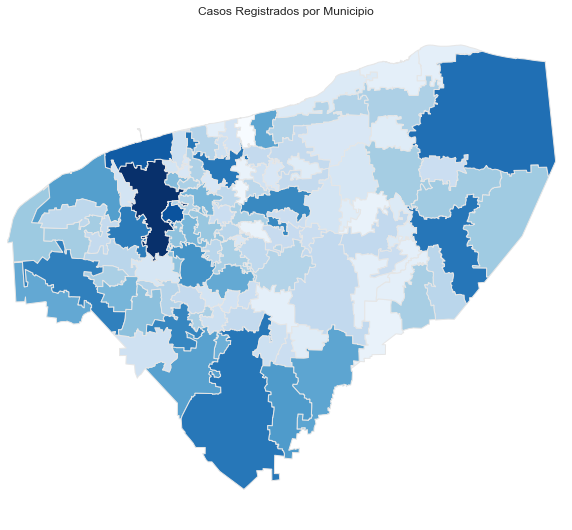

In [85]:
fig, ax = plt.subplots(1, figsize=(10,10))
#legend = False
gdf.plot(column=gdf['Casos registrados log'], cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9')
plt.ylim([0.88e6, 1.15e6])
plt.xlim([3.7e6, 4e6])
plt.axis('off')
plt.title('Casos Registrados por Municipio')
plt.show()

In [86]:
print(gdf.crs)

PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DATUM["International_Terrestrial_Reference_Frame_2008",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [87]:
import pyproj
gdf_crs = gdf.to_crs(pyproj.CRS.from_epsg(4326))

In [88]:
print(gdf_crs.crs)

epsg:4326


In [89]:
fig = px.choropleth(gdf_crs, geojson=gdf_crs.geometry_mun, 
                    locations=gdf_crs.index, color="Casos registrados log",
                    height=500,
                   color_continuous_scale="Viridis",
                    labels = {'index':'Municipio', "Casos registrados log":'log10'},
                    hover_data={"Casos registrados":True, "Casos registrados log":False},
                    title='Mapa 1. Casos Registrados por Municipio',
                   )
fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(xaxis=dict(domain=[0, 0.5]), yaxis=dict(domain=[0.25, 0.75]))

fig.add_annotation(
    # The arrow head will be 25% along the x axis, starting from the left
    x=0,
    # The arrow head will be 40% along the y axis, starting from the bottom
    y=0.98,
    text="<b>Temporalidad:</b> 2015-2021<br><b>Total de casos:</b> 14,512",
    showarrow=False,
    bordercolor="black",
    bgcolor="white",
    borderwidth=1.5,
    opacity=0.8
)

fig.update(layout = dict(title=dict(x=0.5)))
fig.update_layout(
    margin={"r":0,"t":30,"l":10,"b":10},
    coloraxis_colorbar={
        'title':'Log10'})
fig.update_layout(title_y=1, title_x=0)
fig.update_layout(coloraxis_showscale=True, height=500)
pio.write_html(fig, file='../docs/figs/mapa.html', include_plotlyjs='cdn', full_html=False)
fig.show()

## Graficos Interactivos

In [90]:
# ACTIVIDAD/OCUPACION MUJERES



In [91]:
semujeres.ACTIVIDAD.unique()

array(['Trabaja fuera del hogar', 'Trabaja en el hogar', 'Estudia',
       'Jubilada/Pensionada', 'Se desconoce',
       'Trabaja en el hogar,Trabaja fuera del hogar', 'Otro',
       'Trabaja fuera del hogar,Estudia', 'Trabaja fuera del hogar,Otro',
       'Trabaja en el hogar,Otro', 'Trabaja en el hogar,Pensionada',
       'Trabaja en el hogar,Estudia', 'Estudia,Otro',
       'Trabaja en el hogar,Jubilada/Pensionada',
       'Trabaja en el hogar,Se desconoce'], dtype=object)

In [92]:
semujeres = pd.concat([semujeres, semujeres.ACTIVIDAD.str.get_dummies(sep=',')], axis=1)

In [93]:
semujeres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14512 entries, 0 to 28369
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   fk_euv                                14512 non-null  object        
 1   pk_caso                               14512 non-null  int64         
 2   Dependencia de recepcion              14512 non-null  object        
 3   Usuario                               14512 non-null  object        
 4   nombre                                14512 non-null  object        
 5   paterno                               14506 non-null  object        
 6   materno                               14389 non-null  object        
 7   Nacionalidad                          14512 non-null  object        
 8   num_hijos                             14512 non-null  int64         
 9   Edad                                  14512 non-null  int64         
 10

In [94]:
semujeres.iloc[:,[54,55,56,57,58,59,60]]

grupos_riesgo  Estudia  Jubilada/Pensionada  Otro  Pensionada  \
0          MODERADO        0                    0     0           0   
1          MODERADO        0                    0     0           0   
2          MODERADO        0                    0     0           0   
3          MODERADO        0                    0     0           0   
4          MODERADO        0                    0     0           0   
...             ...      ...                  ...   ...         ...   
28364      MODERADO        0                    0     0           0   
28365         GRAVE        0                    0     0           0   
28366       EXTREMO        0                    0     0           0   
28368         GRAVE        0                    0     0           0   
28369         GRAVE        0                    0     0           0   

       Se desconoce  Trabaja en el hogar  
0                 0                    0  
1                 0                    0  
2                 0                    1  
3                 0                    1  
4                 0                    0  
...             ...                  ...  
28364             0                    0  
28365             0                    1  
28366             0                    0  
28368             0                    1  
28369             0                    0  

[14512 rows x 7 columns]

In [95]:
y = [semujeres['Trabaja en el hogar'].sum(), semujeres['Trabaja fuera del hogar'].sum(),semujeres['Estudia'].sum(), semujeres['Jubilada/Pensionada'].sum()+semujeres['Pensionada'].sum(),semujeres['Otro'].sum(),semujeres['Se desconoce'].sum()]
#y_total = sum(y)
y_total = np.array(len(semujeres), dtype=int)
fig = px.bar(x=['Trabaja en el hogar', 'Trabaja fuera del hogar','Estudia','Jubilada/Pensionada','Otro','Se desconoce'], 
            y = y,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Actividad', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:6],
            color_discrete_map="identity",
            title='Gráfica 1. Actividad que realizan las mujeres'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis={'categoryorder':'total descending'}, xaxis_title=None, height=500)
#fig.update_traces(texttemplate='%{text} %', textposition='outside')
fig.update_traces(texttemplate='%{text} %')
pio.write_html(fig, file='../docs/figs/g1.html', include_plotlyjs='cdn', full_html=False)
#fig.update_xaxes(title='x', visible=False, showticklabels=True)
fig.show()

In [96]:
px.colors.qualitative.Prism

['rgb(95, 70, 144)',
 'rgb(29, 105, 150)',
 'rgb(56, 166, 165)',
 'rgb(15, 133, 84)',
 'rgb(115, 175, 72)',
 'rgb(237, 173, 8)',
 'rgb(225, 124, 5)',
 'rgb(204, 80, 62)',
 'rgb(148, 52, 110)',
 'rgb(111, 64, 112)',
 'rgb(102, 102, 102)']

In [97]:
semujeres.escolaridad.unique()
validez = semujeres[semujeres.escolaridad=='Estudios que no requieren validéz oficial'].index
tecnica = semujeres[semujeres.escolaridad=='Carrera técnica comercial'].index
semujeres.loc[validez,'escolaridad']='Sin validez'
semujeres.loc[tecnica,'escolaridad']='Carrera técnica'

In [98]:
semujeres.escolaridad.unique()

array(['Preparatoria', 'Primaria', 'Secundaria', 'Licenciatura',
       'Preescolar', 'Ninguna', 'Posgrado', 'Sin validez',
       'Carrera técnica', 'Maestría', 'Doctorado'], dtype=object)

In [99]:
y = semujeres.escolaridad.value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres.escolaridad.value_counts().index,
            y=semujeres.escolaridad.value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Escolaridad', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:11],
            color_discrete_map="identity",
            title='Gráfica 2. Estudios Concluidos'
            )
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g2.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [100]:
y = semujeres.EstadoCivil.value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres.EstadoCivil.value_counts().index,
            y=semujeres.EstadoCivil.value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Estado Civil', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:8],
            color_discrete_map="identity",
            title='Gráfica 3. Estado Civil'
            )
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g3.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [101]:
nan = semujeres[semujeres['Habla Indigena'].isna()==True].index
semujeres.loc[nan, 'Habla Indigena'] = 'No'
des = semujeres[semujeres['Habla Indigena']=='Desconocido'].index
semujeres.loc[des, 'Habla Indigena'] = 'No'

In [102]:
y = semujeres['Habla Indigena'].value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres['Habla Indigena'].value_counts().index,
            y=semujeres['Habla Indigena'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Habla lengua indígena', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:2],
            color_discrete_map="identity",
            title='Gráfica 4. Mujeres que hablan Lengua Indígena'
            )
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g4.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [103]:
y = semujeres['Conocimiento de autoridad'].value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres['Conocimiento de autoridad'].value_counts().index,
            y=semujeres['Conocimiento de autoridad'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Conocimiento de alguna autoridad', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:2],
            color_discrete_map="identity",
            title='Gráfica 5. Casos que son conocidos por alguna autoridad'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g5.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [104]:
si_conocimiento = semujeres[semujeres['Conocimiento de autoridad']=='Si']

mp = si_conocimiento['Descripcion de autoridad'].str.contains("MINISTERIO").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("MP").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("M.P").sum() 
fg = si_conocimiento['Descripcion de autoridad'].str.contains("FIS").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("FG").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("F.G").sum()
juz = si_conocimiento['Descripcion de autoridad'].str.contains("JUZ").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("JUEZ").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("JZ").sum()
agencia = si_conocimiento['Descripcion de autoridad'].str.contains("AGE").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("AG").sum()
cjm = si_conocimiento['Descripcion de autoridad'].str.contains("JUS").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("CJ").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("JM").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("B1").sum()
prod = si_conocimiento['Descripcion de autoridad'].str.contains("PRODE").sum()
salud = si_conocimiento['Descripcion de autoridad'].str.contains("SALUD").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("HOSP").sum()
judicial = si_conocimiento['Descripcion de autoridad'].str.contains("MUN").sum() + si_conocimiento['Descripcion de autoridad'].str.contains("SSP").sum()
judicial_juzgado = judicial+juz
fis_agencia = fg + agencia

In [105]:
dic_autoridades = { 'Autoridad':['Ministerio Público','Fiscalía','PRODENNAY', 'CJM','Centro de Salud', 'Poder Judicial'],
                    'Porcentaje':100*np.array([mp, fis_agencia,  prod,  cjm, salud,judicial_juzgado])/sum([mp, fis_agencia,  prod,  cjm, salud, judicial_juzgado]),
                    'Count': np.array([mp, fis_agencia, prod,  cjm, salud, judicial_juzgado])}

In [106]:
autoridades = pd.DataFrame(dic_autoridades)
autoridades = autoridades.sort_values('Count', ascending=False)
autoridades

Autoridad  Porcentaje  Count
1            Fiscalía   54.396371   1559
5      Poder Judicial   30.006978    860
0  Ministerio Público   11.549197    331
3                 CJM    2.407537     69
2           PRODENNAY    1.430565     41
4     Centro de Salud    0.209351      6

In [107]:
y = autoridades['Count']
y_total = sum(y)
fig = px.bar(x=autoridades['Autoridad'],
            y=autoridades['Count'],
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Autoridad', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:6],
            color_discrete_map="identity",
            title='Gráfica 6. Autoridad que conoce el caso'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g6.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [108]:
semujeres = pd.concat([semujeres, semujeres.tipos.str.get_dummies(sep=',')], axis=1)

In [109]:
semujeres.descripcion_otro_tipos.unique()

array([nan, 'FEMINICIDA'], dtype=object)

In [110]:
tipos = semujeres.iloc[:,[62,63,64,65,66,67]]
tipos = pd.DataFrame(tipos.sum())
tipos = tipos.sort_values(0,ascending=False)
new_row = pd.Series(data={0:sum(semujeres.descripcion_otro_tipos=='FEMINICIDA')}, name='Feminicida')
#append row to the dataframe
tipos = tipos.append(new_row)
tipos

0
Psicológica  13467
Económica    10738
Física        5695
Patrimonial   2477
Sexual        1929
Otro           340
Feminicida     330

In [111]:
y = tipos[0].values
y_total = len(semujeres)
fig = px.bar(x=tipos.index,
            y=tipos[0],
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Tipo de violencia', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:7],
            color_discrete_map="identity",
            title='Gráfica 7. Tipo de violencia registrada'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None,  height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g7.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [112]:
semujeres.descripcion_otro_tipos

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
28364           NaN
28365           NaN
28366    FEMINICIDA
28368           NaN
28369           NaN
Name: descripcion_otro_tipos, Length: 14512, dtype: object

In [113]:
semujeres.modalidad.unique()

array(['Familiar', 'Institucional', 'En la comunidad', 'Laboral',
       'Escolar/Docente', 'Digital/Cibernética', 'Política'], dtype=object)

In [114]:
y = semujeres.modalidad.value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres.modalidad.value_counts().index,
            y=semujeres.modalidad.value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Modalidad de la violencia', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:7],
            color_discrete_map="identity",
            title='Gráfica 8. Modalidad de la violencia'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None,  height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g8.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [115]:
semujeres['Tipo de vínculo con victima'].unique()

array(['Familiar', 'Otro', 'En la comunidad', 'Laboral y docente',
       'Institucional'], dtype=object)

In [116]:
prismas = px.colors.qualitative.Prism 
prismas += px.colors.qualitative.Prism 

In [117]:
y = semujeres['Detalle del Tipo Vínculo con victima'].value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres['Detalle del Tipo Vínculo con victima'].value_counts().index,
            y=semujeres['Detalle del Tipo Vínculo con victima'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Detalle del vínculo con la víctima', "y":'Número de casos', 'text':'Porcentaje'},
            color=prismas[:21],
            color_discrete_map="identity",
            title='Gráfica 10. Detalle del vínculo con la víctima'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis={'categoryorder':'total descending'}, height=500)
fig.update_layout( xaxis_title=None)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g10.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [176]:
# violencia en los ultimos 12 meses
tuvo_violencia = semujeres[(semujeres['Detalle del Tipo Vínculo con victima'].isin(['Cónyuge o pareja ', 'Ex pareja']))&(semujeres['fecha_recepcion']>'2020-08-23')]
ultimo_año = semujeres[semujeres['fecha_recepcion']>'2020-08-23']
ultimo_año['violencia_ex_pareja'] = 'No'
ultimo_año.loc[tuvo_violencia.index, 'violencia_ex_pareja'] = 'Si'
y = ultimo_año['violencia_ex_pareja'].value_counts().values
y_total = len(ultimo_año)
fig = px.bar(x=ultimo_año['violencia_ex_pareja'].value_counts().index,
            y=ultimo_año['violencia_ex_pareja'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Victima de violencia', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:2],
            color_discrete_map="identity",
            title="""Gráfica 11. Mujeres que han experimentado violencia por parte de su última pareja en los últimos 12 meses<br><b>Total de casos en los últimos 12 meses:</b> {}""".format(len(ultimo_año))
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
"""fig.add_annotation(
    # The arrow head will be 25% along the x axis, starting from the left
    x=0.5,
    # The arrow head will be 40% along the y axis, starting from the bottom
    y=2000,
    text="<b>Total de casos en los últimos 12 meses:</b> {}".format(len(ultimo_año)),
    showarrow=False,
    bordercolor="black",
    bgcolor="white",
    borderwidth=1.5,
    opacity=0.8
)"""
pio.write_html(fig, file='../docs/figs/g21.html',include_plotlyjs='cdn', full_html=False)
fig.show()

<ipython-input-176-d3da3b168d82>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\carol\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
y = semujeres['Tipo de vínculo con victima'].value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres['Tipo de vínculo con victima'].value_counts().index,
            y=semujeres['Tipo de vínculo con victima'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Tipo de vínculo con la víctima', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:5],
            color_discrete_map="identity",
            title='Gráfica 9. Tipo de vínculo con la víctima'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g9.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [178]:
semujeres['Victima de Trata'].value_counts()

No    14507
Si        5
Name: Victima de Trata, dtype: int64

In [179]:
no = semujeres[semujeres['Victima de Trata']=='Se desconoce'].index
semujeres.loc[no, 'Victima de Trata']= 'No'

In [180]:
y = semujeres['Victima de Trata'].value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres['Victima de Trata'].value_counts().index,
            y=semujeres['Victima de Trata'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Victima de Trata', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:2],
            color_discrete_map="identity",
            title='Gráfica 12. Casos relacionados con el delito de Trata'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
pio.write_html(fig, file='../docs/figs/g11.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [181]:
y = semujeres['Victima de delincuencia'].value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres['Victima de delincuencia'].value_counts().index,
            y=semujeres['Victima de delincuencia'].value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Victima de delincuencia', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:2],
            color_discrete_map="identity",
            title='Gráfica 13. Casos relacionados con Delincuencia Organizada'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis_title=None, height=500)
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['No','Si']
    )
)
pio.write_html(fig, file='../docs/figs/g12.html',include_plotlyjs='cdn', full_html=False)
fig.show()

In [182]:
servicios_semujeres.serviciodetalle.unique()

array(['Legales y/o jurídicos', 'Violencia y género', 'Psicológico',
       'Canalización', 'Otros', 'Trabajo Social', 'Alimentación',
       'Trámites y Gestiones', 'Atención ciudadana', 'Salud',
       'Procesos de Formación', 'Vivienda'], dtype=object)

In [183]:
y = servicios_semujeres.serviciodetalle.value_counts().values
y_total = sum(y)
fig = px.bar(x=servicios_semujeres.serviciodetalle.value_counts().index,
            y=servicios_semujeres.serviciodetalle.value_counts().values,
            text= np.round(y/y_total*100,2),
            labels = {'x': 'Servicio proporcionado', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:12],
            color_discrete_map="identity",
            title='Gráfica 14. Servicios proporcionados por la SEMUJERES'
            )
fig.update_xaxes(type='category')
fig.update_layout( xaxis={'categoryorder':'total descending'}, height=500)
fig.update_layout( xaxis_title=None)
fig.update_traces(texttemplate='%{text} %')
pio.write_html(fig, file='../docs/figs/g13.html',include_plotlyjs='cdn', full_html=False)
#fig.update_xaxes(visible=False, showticklabels=False)
fig.show()

In [184]:
servicios_semujeres.serviciodetalle.value_counts()

Violencia y género       3836
Legales y/o jurídicos     889
Psicológico               610
Trabajo Social            551
Otros                     288
Canalización               45
Atención ciudadana         11
Trámites y Gestiones        7
Alimentación                3
Salud                       2
Procesos de Formación       1
Vivienda                    1
Name: serviciodetalle, dtype: int64

In [185]:
servicios_semujeres.dependenciaquebrindoservicio.unique()

array(['SECRETARÍA DE LAS MUJERES'], dtype=object)

In [186]:
tipos = semujeres.iloc[:,[62,63,64,65,66,67]]
tipos

Económica  Física  Otro  Patrimonial  Psicológica  Sexual
0              0       0     0            0            1       0
1              0       0     0            0            1       0
2              1       0     0            0            0       0
3              1       0     0            0            0       0
4              1       0     0            0            0       1
...          ...     ...   ...          ...          ...     ...
28364          0       0     0            0            1       0
28365          1       1     0            0            1       1
28366          1       1     1            0            1       1
28368          1       1     0            0            1       1
28369          1       0     0            0            1       0

[14512 rows x 6 columns]

In [187]:
def matrix(df):
    arr = np.zeros(shape=(6,6), dtype=int)
    
    for index, row in df.iterrows():
        i, j= 0, 0
        #print(row)
        for col_1 in df.columns:
            for col_2 in df.columns:
                if (row[col_1]==1) and (row[col_2] == 1):
                    arr[i][j] += 1
                j += 1
            j = 0
            i += 1
        i = 0
    return arr


In [188]:
mat = matrix(tipos)
mat

array([[10738,  4000,   259,  1906,  9772,  1450],
       [ 4000,  5695,   300,  1708,  5500,  1482],
       [  259,   300,   340,   187,   333,   136],
       [ 1906,  1708,   187,  2477,  2400,   731],
       [ 9772,  5500,   333,  2400, 13467,  1867],
       [ 1450,  1482,   136,   731,  1867,  1929]])

In [189]:
names = list(tipos.columns)
names

['Económica', 'Física', 'Otro', 'Patrimonial', 'Psicológica', 'Sexual']

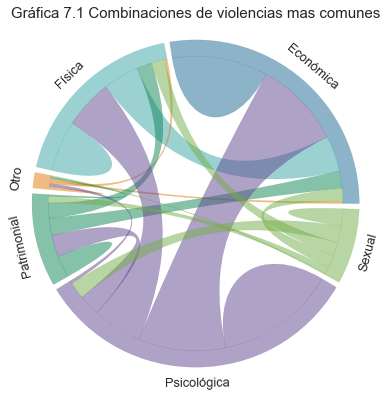

In [190]:
# chord diagram
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

import numpy as np

LW = 0.3

def polar2xy(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)])

def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

def IdeogramArc(start=0, end=60, radius=1.0, width=0.2, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/how-to-create-circle-with-b%C3%A9zier-curves
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    inner = radius*(1-width)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)


def ChordArc(start1=0, end1=60, start2=180, end2=240, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start1 > end1:
        start1, end1 = end1, start1
    if start2 > end2:
        start2, end2 = end2, start2
    start1 *= np.pi/180.
    end1 *= np.pi/180.
    start2 *= np.pi/180.
    end2 *= np.pi/180.
    opt1 = 4./3. * np.tan((end1-start1)/ 4.) * radius
    opt2 = 4./3. * np.tan((end2-start2)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start1),
        polar2xy(radius, start1) + polar2xy(opt1, start1+0.5*np.pi),
        polar2xy(radius, end1) + polar2xy(opt1, end1-0.5*np.pi),
        polar2xy(radius, end1),
        polar2xy(rchord, end1),
        polar2xy(rchord, start2),
        polar2xy(radius, start2),
        polar2xy(radius, start2) + polar2xy(opt2, start2+0.5*np.pi),
        polar2xy(radius, end2) + polar2xy(opt2, end2-0.5*np.pi),
        polar2xy(radius, end2),
        polar2xy(rchord, end2),
        polar2xy(rchord, start1),
        polar2xy(radius, start1),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

def selfChordArc(start=0, end=60, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

def chordDiagram(X, ax, colors=None, width=0.1, pad=2, chordwidth=0.7):
    """Plot a chord diagram
    Parameters
    ----------
    X :
        flux data, X[i, j] is the flux from i to j
    ax :
        matplotlib `axes` to show the plot
    colors : optional
        user defined colors in rgb format. Use function hex2rgb() to convert hex color to rgb color. Default: d3.js category10
    width : optional
        width/thickness of the ideogram arc
    pad : optional
        gap pad between two neighboring ideogram arcs, unit: degree, default: 2 degree
    chordwidth : optional
        position of the control points for the chords, controlling the shape of the chords
    """
    # X[i, j]:  i -> j
    x = X.sum(axis = 1) # sum over rows
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    if colors is None:
    # use d3.js category10 https://github.com/d3/d3-3.x-api-reference/blob/master/Ordinal-Scales.md#category10
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        if len(x) > 10:
            print('x is too large! Use x smaller than 10')
        colors = [hex2rgb(colors[i]) for i in range(len(x))]

    # find position for each start and end
    y = x/np.sum(x).astype(float) * (360 - pad*len(x))

    pos = {}
    arc = []
    nodePos = []
    start = 0
    for i in range(len(x)):
        end = start + y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)
        #print(start, end, angle)
        if -30 <= angle <= 210:
            angle -= 90
        else:
            angle -= 270
        nodePos.append(tuple(polar2xy(1.1, 0.5*(start+end)*np.pi/180.)) + (angle,))
        z = (X[i, :]/x[i].astype(float)) * (end - start)
        ids = np.argsort(z)
        z0 = start
        for j in ids:
            pos[(i, j)] = (z0, z0+z[j])
            z0 += z[j]
        start = end + pad

    for i in range(len(x)):
        start, end = arc[i]
        IdeogramArc(start=start, end=end, radius=1.0, ax=ax, color=colors[i], width=width)
        start, end = pos[(i,i)]
        selfChordArc(start, end, radius=1.-width, color=colors[i], chordwidth=chordwidth*0.7, ax=ax)
        for j in range(i):
            color = colors[i]
            if X[i, j] > X[j, i]:
                color = colors[j]
            start1, end1 = pos[(i,j)]
            start2, end2 = pos[(j,i)]
            ChordArc(start1, end1, start2, end2,
                     radius=1.-width, color=colors[i], chordwidth=chordwidth, ax=ax)

    #print(nodePos)
    return nodePos

##################################
if __name__ == "__main__":
    fig = plt.figure(figsize=(5,5))
    flux =  mat

    ax = plt.axes([0,0,1,1])

    nodePos = chordDiagram(flux, ax, colors=[hex2rgb(x) for x in [
 
 '#1d6996', # azul
 '#38a6a5', # azul verdoso
 '#e17c05', # naranja
 '#0f8554', # verde
 '#5f4690', # morado
 '#73af48', # verde claro

 
 ]])
    #nodePos = chordDiagram(flux, ax)
    ax.axis('off')
    prop = dict(fontsize=16*0.8, ha='center', va='center')
    nodes = names
    for i in range(6):
        ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2], **prop)

    plt.title('Gráfica 7.1 Combinaciones de violencias mas comunes', size=15)

    plt.savefig("../docs/figs/chord.png", dpi=600,
            transparent=True,
            bbox_inches='tight', pad_inches=0.02)

In [191]:
print(px.colors.qualitative.Prism[:6])

['rgb(95, 70, 144)', 'rgb(29, 105, 150)', 'rgb(56, 166, 165)', 'rgb(15, 133, 84)', 'rgb(115, 175, 72)', 'rgb(237, 173, 8)']


In [192]:
import plotly.graph_objects as go

x = semujeres.EstadoCivil.value_counts().index
y = semujeres.EstadoCivil.value_counts().values

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=np.round(y/sum(y)*100,2),
            textposition='auto',
        )])
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
fig.show()

In [193]:
y = semujeres.EstadoCivil.value_counts().values
y_total = sum(y)
fig = px.bar(x=semujeres.EstadoCivil.value_counts().index,
            y=semujeres.EstadoCivil.value_counts().values,
            text= np.round(y/y_total*100,1),
            labels = {'x': 'Escolaridad', "y":'Número de casos', 'text':'Porcentaje'},
            color=px.colors.qualitative.Prism[:8],
            color_discrete_map="identity"
            )
fig.update_xaxes(type='category')
#fig.update_layout( xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text} %')
#fig.update_xaxes(visible=False, showticklabels=False)
fig.show()